<a href="https://colab.research.google.com/github/eliassalazarb/FisicaComputacional1/blob/main/Actividad7/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algebra Lineal con SciPy.**

Utilizaremos la biblioteca scipy.linalg para operar con vectores y matrices (Arreglos de NumPy: 1-D, 2-D, 3-D, etc).



In [ ]:
# Cargamos las bibliotecas para trabajar en Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Ejercicio 1**

In [ ]:
# Definimos las matrices
A = np.array([[1,3],[-1,7]])
print(A)

B = np.array([[5,2],[1,2]])
print(B)

I = np.eye(2, dtype=int)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [ ]:
print('2*I+3*A+A@B')
print('Resultado')
print(2*I+3*A+A@B)

2*I+3*A+A@B
Resultado
[[13 17]
 [-1 35]]


**Ejercicio 2**

In [ ]:
# Definimos números aleatorios y la matriz
a = random.randint(0,10)
b = random.randint(0,10)
c = random.randint(0,10)
d = random.randint(0,10)

M = np.array([[a,b],[c,d]])
print('Matriz')
print(M)
det_M = la.det(M)
tr_M = np.trace(M)
print('det(M) =',det_M)
print('traza(M) =',tr_M)

if det_M != 0:
  PM = det_M*I - (tr_M)*M + M@M
  print('P(M) = det(M)- tr(M)M + M^2')
  print(PM)
else:
  print('El determinante es 0')

Matriz
[[ 4  3]
 [10  3]]
det(M) = -18.0
traza(M) = 7
P(M) = det(M)- tr(M)M + M^2
[[0. 0.]
 [0. 0.]]


**Ejercicio 3**

In [ ]:
# Definimos la Matriz
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)

# definimos b
b = np.array([1,5,0]).reshape(3,1)
print(b)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
[[1]
 [5]
 [0]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x = la.solve(M, b)
print(x)

[[3.]
 [2.]
 [4.]]


In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [ ]:
# Matriz aumentada: Unimos la matriz M con la matriz Identidad 
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# "Sumar k veces el renglón j al renglón i en la matriz A."
# add_row(A,k,i,j):
# 1) L2 - 3 L1 ->  L2; 
A1 = add_row(A,-3,1,0)
print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 2) 1/5 L2 ->  L2; 
#    L1 + 3 L2 -> L1;
#    L3 - 2 L2 -> L3;
A2_2 = scale_row(A1,0.2,1)
A2_1 = add_row(A2_2,3,0,1)
A2 = add_row(A2_1,-2,2,1)
print(A2)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   1.  -0.4 -0.6  0.2  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
# 3) -5 L3 ->  L3; 
#    L1 + 1 L3 -> L1;
#    L2 + 2 L3 -> L2;
A3_2 = scale_row(A2,-5,2)
A3_1 = add_row(A3_2,0.2,0,2)
A3 = add_row(A3_1,0.4,1,2)
print(A3)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -6.00000000e+00
   2.00000000e+00 -5.00000000e+00]]


In [ ]:
# Hemos obtenido la inversa
M_inv = A3[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
# El producto de M_inv @ M = I 
result = M_inv @ M
print(result)

[[ 1.00000000e+00  1.77635684e-15 -4.44089210e-16]
 [-4.44089210e-16  1.00000000e+00 -4.44089210e-16]
 [-8.88178420e-16  3.55271368e-15  1.00000000e+00]]


In [ ]:
# Checamos la inversa de M con la función 'la.inv(M)'
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [ ]:
# La solución es:
x = M_inv @ b 
print(x)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4**


In [ ]:
# Definimos las matrices
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print('B1:')
print(B1)
print('B2:')
print(B2)
print('B3:')
print(B3)

B1:
[[2 0 0]
 [0 3 4]
 [0 4 9]]
B2:
[[0 1 0]
 [0 0 1]
 [1 0 0]]
B3:
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()

# Matriz 1
eigvals1, eigvecs1 = la.eig(B1)
print('Eigenvalores B1:')
print(np.round(eigvals1,2))
print('Eigenvectores B1:')
print(np.round(eigvecs1,2))
print('')

# Matriz 2
eigvals2, eigvecs2 = la.eig(B2)
print('Eigenvalores B2:')
print(np.round(eigvals2,2))
print('Eigenvectores B2:')
print(np.round(eigvecs2,2))
print('')

# Matriz 3
eigvals3, eigvecs3 = la.eig(B3)
print('Eigenvalores B3:')
print(np.round(eigvals3,2))
print('Eigenvectores B1:')
print(np.round(eigvecs3,2))

Eigenvalores B1:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]

Eigenvalores B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Eigenvectores B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]

Eigenvalores B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores B1:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]


**Ejercicio 5**

In [ ]:
## Como tenemos un total de 8 puntos realizaremos una interpolacion con un polinomio de grado 7 donde
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

##Nuestra matriz para la variable x será
X = np.column_stack([x**k for k in range(0,8)])

## La solución para la ecuación Xa=y usando spicy.linalg==la
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


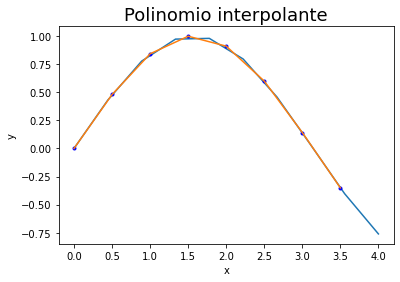

In [ ]:
# Graficamos los resultados del polinomio interpolante de coeficientes a[0], a[1], y a[2]
# Sobreponemos en la gráfica los puntos conocidos en azul con puntos ('b.')
xs = np.linspace(0,4,10)
ys_temp = 0
for n in range(0,8):
  ys = ys_temp + a[n]*xs**n
  ys_temp = ys
plt.plot(xs,ys,x,y,'b.', x, np.sin(x))
plt.title('Polinomio interpolante', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Ejercicio 6**

In [ ]:
# Tomar datos del url en formato "raw"
url = 'https://raw.githubusercontent.com/eduardxmartinez/FisicaComputacional/master/Actividad1/2030.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_tkt = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_tkt0 = df_tkt.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_tkt1 = df_tkt0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_tkt1[cols] = pd.to_numeric(df_tkt0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_tkt2 = df_tkt1.copy()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_tkt2['Fecha'] = pd.to_datetime(df_tkt2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_tkt2['Año'] = df_tkt2['Fecha'].dt.year
df_tkt2['Mes'] = df_tkt2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_meteotkt = df_tkt2.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_meteotkt.drop('Mes', axis=1, inplace=True)
df_meteotkt['Mes'] = df_meteotkt['Fecha'].dt.strftime('%b')

# Nueva copia del DataFrame para Series de Tiempo
df_meteotkt_ts = df_meteotkt.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_meteotkt_ts = df_meteotkt.set_index('Fecha')

# Seleccionaremos un conjunto de años de 30 años
df_90 = df_meteotkt_ts[(df_meteotkt_ts['Año'] >= 1990) & (df_meteotkt_ts['Año'] < 2013)]

In [ ]:
ts_test_TMX = df_90.Tmax
decomposition_TMX = sm.tsa.seasonal_decompose(ts_test_TMX.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMX = decomposition_TMX.trend
trend_TMX = trend_TMX[~np.isnan(trend_TMX)]
print(trend_TMX)

Fecha
1990-07-02    26.167123
1990-07-03    26.161644
1990-07-04    26.189041
1990-07-05    26.194521
1990-07-06    26.189041
                ...    
2012-04-28    26.701370
2012-04-29    26.739726
2012-04-30    26.772603
2012-05-01    26.802740
2012-05-02    26.830137
Name: Tmax, Length: 7935, dtype: float64


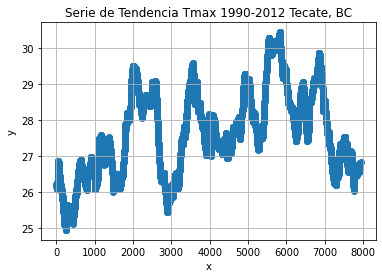

In [ ]:
N = 7935
x = np.arange(0,N)
y = trend_TMX
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmax 1990-2012 Tecate, BC')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (7935, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[2.67882424e+01 2.11487196e-04]


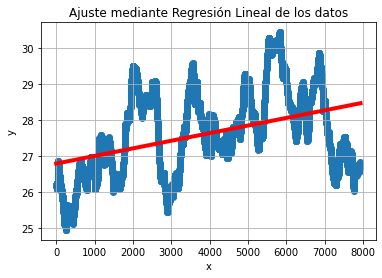

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_test_TMN = df_90.Tmin
decomposition_TMN = sm.tsa.seasonal_decompose(ts_test_TMN.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend_TMN = decomposition_TMN.trend
trend_TMN = trend_TMN[~np.isnan(trend_TMN)]
print(trend_TMN)

Fecha
1990-07-02    8.293151
1990-07-03    8.301370
1990-07-04    8.306849
1990-07-05    8.339726
1990-07-06    8.361644
                ...   
2012-04-28    8.866849
2012-04-29    8.872329
2012-04-30    8.883288
2012-05-01    8.894247
2012-05-02    8.907945
Name: Tmin, Length: 7935, dtype: float64


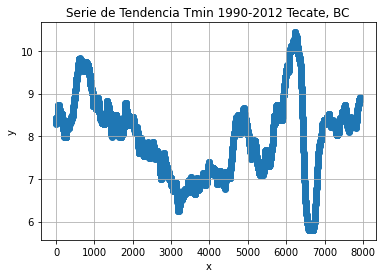

In [ ]:
N = 7935
x = np.arange(0,N)
y = trend_TMN
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia Tmin 1990-2012 Tecate, BC')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 8.14671327e+00 -4.47790886e-05]


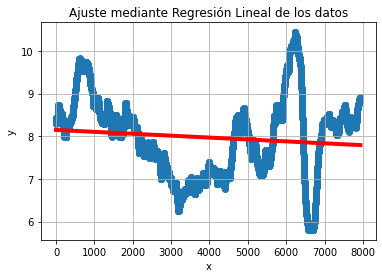

In [ ]:
xs = np.linspace(0,N,20)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()